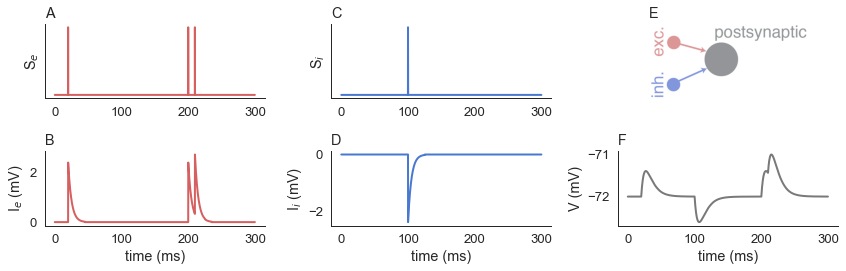

In [1]:
###############################################
## Import packages and specify some settings ##
###############################################
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# This makes plots show up and look nice
%matplotlib inline
sns.set(context='paper',style='white',font_scale=1.5,rc={"lines.linewidth":2.5})
sns.set_palette('muted')

# Keep this set to false unless you want to save figures and data
# (in which case you'll need to change some directories below)
SaveFigures=False
###############################################
###############################################

# Discretized time
T=300
dt=.1 
time=np.arange(0,T,dt)


# Synapse parameters
taue=5 
Je=12
taui=5
Ji=-12

# Neuron parameters
EL=-72 
taum=10


# Presynaptic spike times
ExcSpikeTimes=np.array([20,200,210])
InhSpikeTimes=np.array([100])

# Binarized presynaptic spike train
Se=np.zeros_like(time)
Si=np.zeros_like(time)
Se[np.floor(ExcSpikeTimes/dt).astype(int)]=1/dt
Si[np.floor(InhSpikeTimes/dt).astype(int)]=1/dt

# Use convolutions to define synaptic currents
s=np.arange(-5*taue,5*taue,dt)
alphae=(1/taue)*np.exp(-s/taue)*(s>=0)
alphai=(1/taui)*np.exp(-s/taui)*(s>=0)
Ie=Je*np.convolve(Se,alphae,'same')*dt
Ii=Ji*np.convolve(Si,alphai,'same')*dt


# Euler solver to compute Is and V
V=np.zeros_like(time)
V[0]=EL 
for i in range(len(time)-1):
    V[i+1]=V[i]+dt*(-(V[i]-EL)+Ie[i]+Ii[i])/taum 
    
        

# Make figure
plt.subplots(figsize=(12, 4))

# Raster plot
plt.subplot(2,3,1)
plt.plot(time,Se,color=sns.color_palette()[3])
#plt.xlabel('time (ms)')
plt.ylabel('S$_e$')
plt.title('A',loc='left')
plt.yticks([])
sns.despine()

plt.subplot(2,3,4)
plt.plot(time,Ie,color=sns.color_palette()[3])
plt.xlabel('time (ms)')
plt.ylabel('I$_e$ (mV)')
plt.title('B',loc='left')
sns.despine()


plt.subplot(2,3,2)
plt.plot(time,Si,color=sns.color_palette()[0])
#plt.xlabel('time (ms)')
plt.ylabel('S$_i$')
plt.title('C',loc='left')
plt.yticks([])
sns.despine()


plt.subplot(2,3,5)
plt.plot(time,Ii,color=sns.color_palette()[0])
plt.xlabel('time (ms)')
plt.ylabel('I$_i$ (mV)')
plt.title('D',loc='left')
sns.despine()


plt.subplot(2,3,3)
im = plt.imread('Synapses.png')
plt.imshow(im,interpolation='hanning')
plt.axis('off')
plt.title('E',loc='left')


plt.subplot(2,3,6)
plt.plot(time,V,color=sns.color_palette()[7])
plt.xlabel('time (ms)')
plt.ylabel('V (mV)')
sns.despine()
plt.title('F',loc='left')

plt.tight_layout()


# Save figure if needed
if SaveFigures:
      plt.savefig('../Figures/Synapses.pdf')


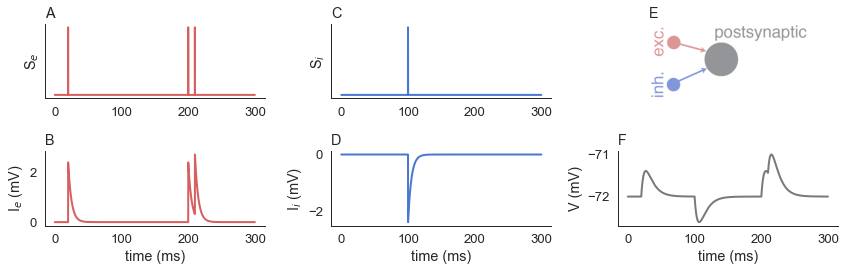

In [4]:
# Same as above, but use Euler's method to compute currents instead of convolution

# Discretized time
T=300
dt=.1 
time=np.arange(0,T,dt)


# Synapse parameters
taue=5 
Je=12
taui=5
Ji=-12

# Neuron parameters
EL=-72 
taum=10


# Presynaptic spike times
ExcSpikeTimes=np.array([20,200,210])
InhSpikeTimes=np.array([100])

# Binarized presynaptic spike train
Se=np.zeros_like(time)
Si=np.zeros_like(time)
Se[np.floor(ExcSpikeTimes/dt).astype(int)]=1/dt
Si[np.floor(InhSpikeTimes/dt).astype(int)]=1/dt




# Euler solver to compute Is and V
Ie=np.zeros_like(time)
Ii=np.zeros_like(time)
V=np.zeros_like(time)
V[0]=EL 
for i in range(len(time)-1):
    V[i+1]=V[i]+dt*(-(V[i]-EL)+Ie[i]+Ii[i])/taum 
    Ie[i+1]=Ie[i]+dt*(-Ie[i]+Je*Se[i])/taue
    Ii[i+1]=Ii[i]+dt*(-Ii[i]+Ji*Si[i])/taui
    
        
# Make figure
plt.subplots(figsize=(12, 4))

# Raster plot
plt.subplot(2,3,1)
plt.plot(time,Se,color=sns.color_palette()[3])
#plt.xlabel('time (ms)')
plt.ylabel('S$_e$')
plt.title('A',loc='left')
plt.yticks([])
sns.despine()

plt.subplot(2,3,4)
plt.plot(time,Ie,color=sns.color_palette()[3])
plt.xlabel('time (ms)')
plt.ylabel('I$_e$ (mV)')
plt.title('B',loc='left')
sns.despine()


plt.subplot(2,3,2)
plt.plot(time,Si,color=sns.color_palette()[0])
#plt.xlabel('time (ms)')
plt.ylabel('S$_i$')
plt.title('C',loc='left')
plt.yticks([])
sns.despine()


plt.subplot(2,3,5)
plt.plot(time,Ii,color=sns.color_palette()[0])
plt.xlabel('time (ms)')
plt.ylabel('I$_i$ (mV)')
plt.title('D',loc='left')
sns.despine()

plt.subplot(2,3,3)
im = plt.imread('Synapses.png')
plt.imshow(im,interpolation='hanning')
plt.axis('off')
plt.title('E',loc='left')


plt.subplot(2,3,6)
plt.plot(time,V,color=sns.color_palette()[7])
plt.xlabel('time (ms)')
plt.ylabel('V (mV)')
sns.despine()
plt.title('F',loc='left')

plt.tight_layout()


# Save figure if needed
if SaveFigures:
      plt.savefig('../Figures/Synapses.pdf')
